# <center> Titanic Survivors <center>
---

In [752]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [753]:
train = pd.read_csv('../res/titanic/train.csv')
test = pd.read_csv('../res/titanic/test.csv')

## Basic information

In [754]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [755]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Unique values

In [756]:
print('Train')
display(train.nunique())

print('Test')
display(test.nunique())

Train


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Test


PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

Types

In [757]:
print('Train')
dtypes = train.dtypes
display(dtypes)

print('Test')
dtypes = test.dtypes
display(dtypes)

Train


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Test


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

NaN values

In [758]:
print('Train')
display(train.isnull().sum())

print('Test')
display(test.isnull().sum())

Train


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data visualization

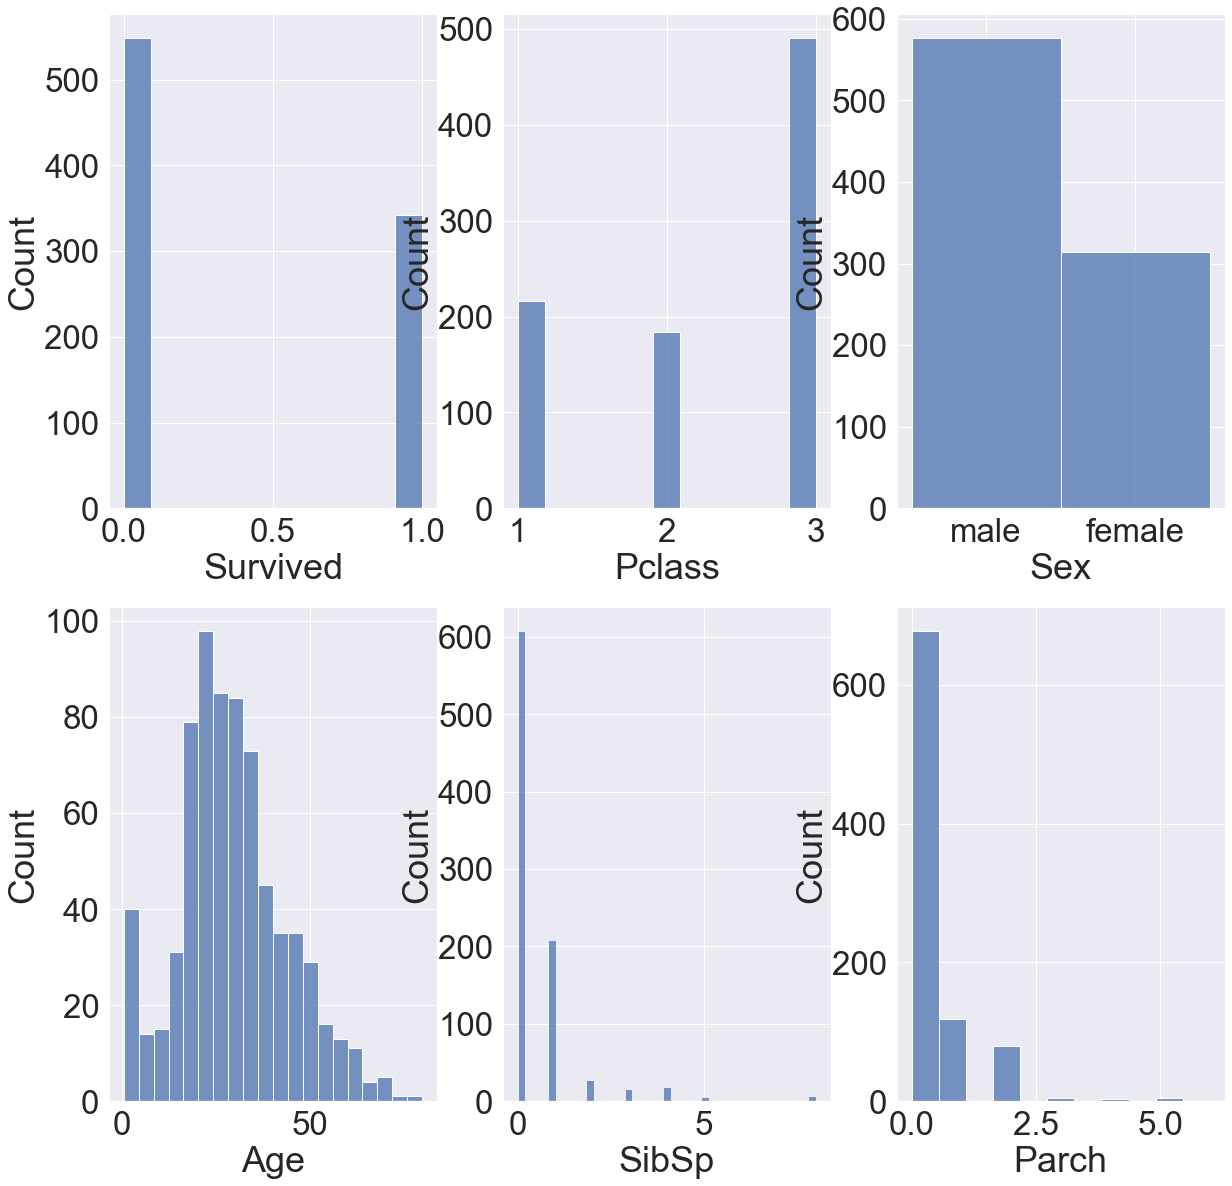

In [759]:
fig, ax  = plt.subplots(2, 3, figsize = (20, 20))

survived_plot = sns.histplot(
    data = train,
    x = 'Survived',
    ax = ax[0, 0]
)

g0 = sns.histplot(
    data = train,
    x = 'Pclass',
    ax = ax[0, 1]
)

gender_plot = sns.histplot(
    data = train,
    x = 'Sex',
    ax = ax[0, 2]
)

age_plot = sns.histplot(
    data = train,
    x = 'Age',
    ax = ax[1, 0]
)


sbspo_plot = sns.histplot(
    data = train,
    x = 'SibSp',
    ax = ax[1, 1]
)


parch_plot = sns.histplot(
    data = train,
    x = 'Parch',
    ax = ax[1, 2]
)

plt.show()

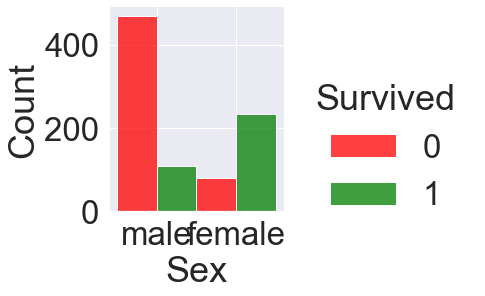

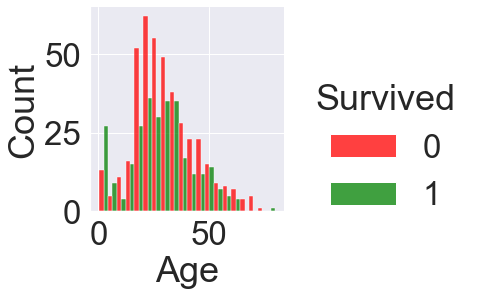

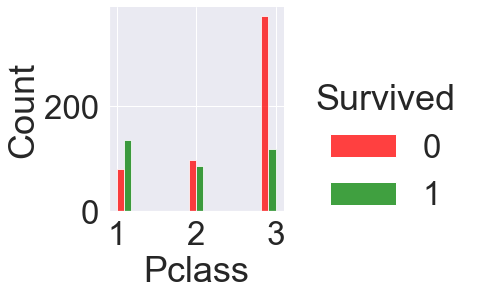

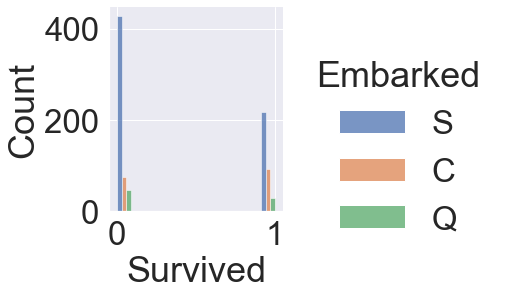

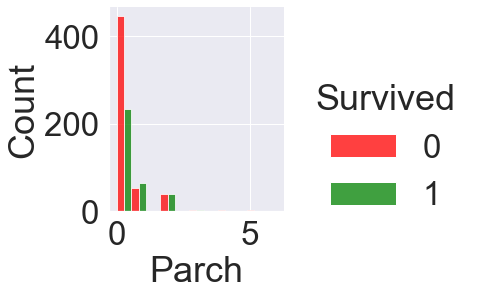

In [760]:
g0 = sns.displot(
    data = train,
    x = 'Sex',
    hue = 'Survived',
    multiple='dodge',
    palette=['red', 'green']
)

g1 = sns.displot(
    data = train,
    x = 'Age',
    hue = 'Survived',
    multiple='dodge',
    palette=['red', 'green']
)

g2 = sns.displot(
    data = train,
    x = 'Pclass',
    hue = 'Survived',
    multiple='dodge',
    palette=['red', 'green']
)

g3 = sns.displot(
    data = train,
    x = 'Survived',
    hue = 'Embarked',
    multiple='dodge',
)

g4 = sns.displot(
    data = train,
    x = 'Parch',
    hue = 'Survived',
    multiple='dodge',
    palette=['red', 'green']
)

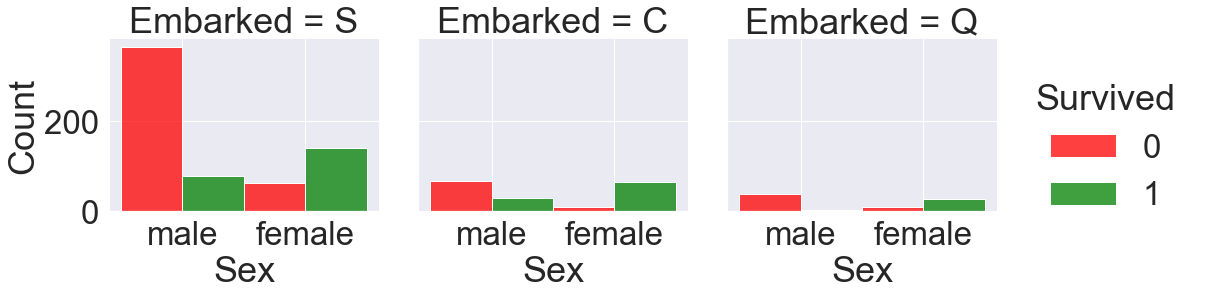

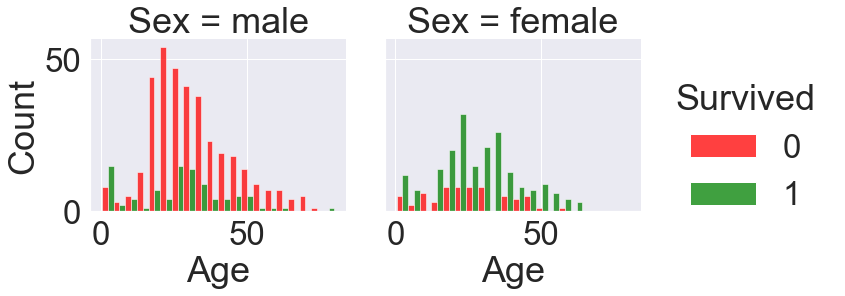

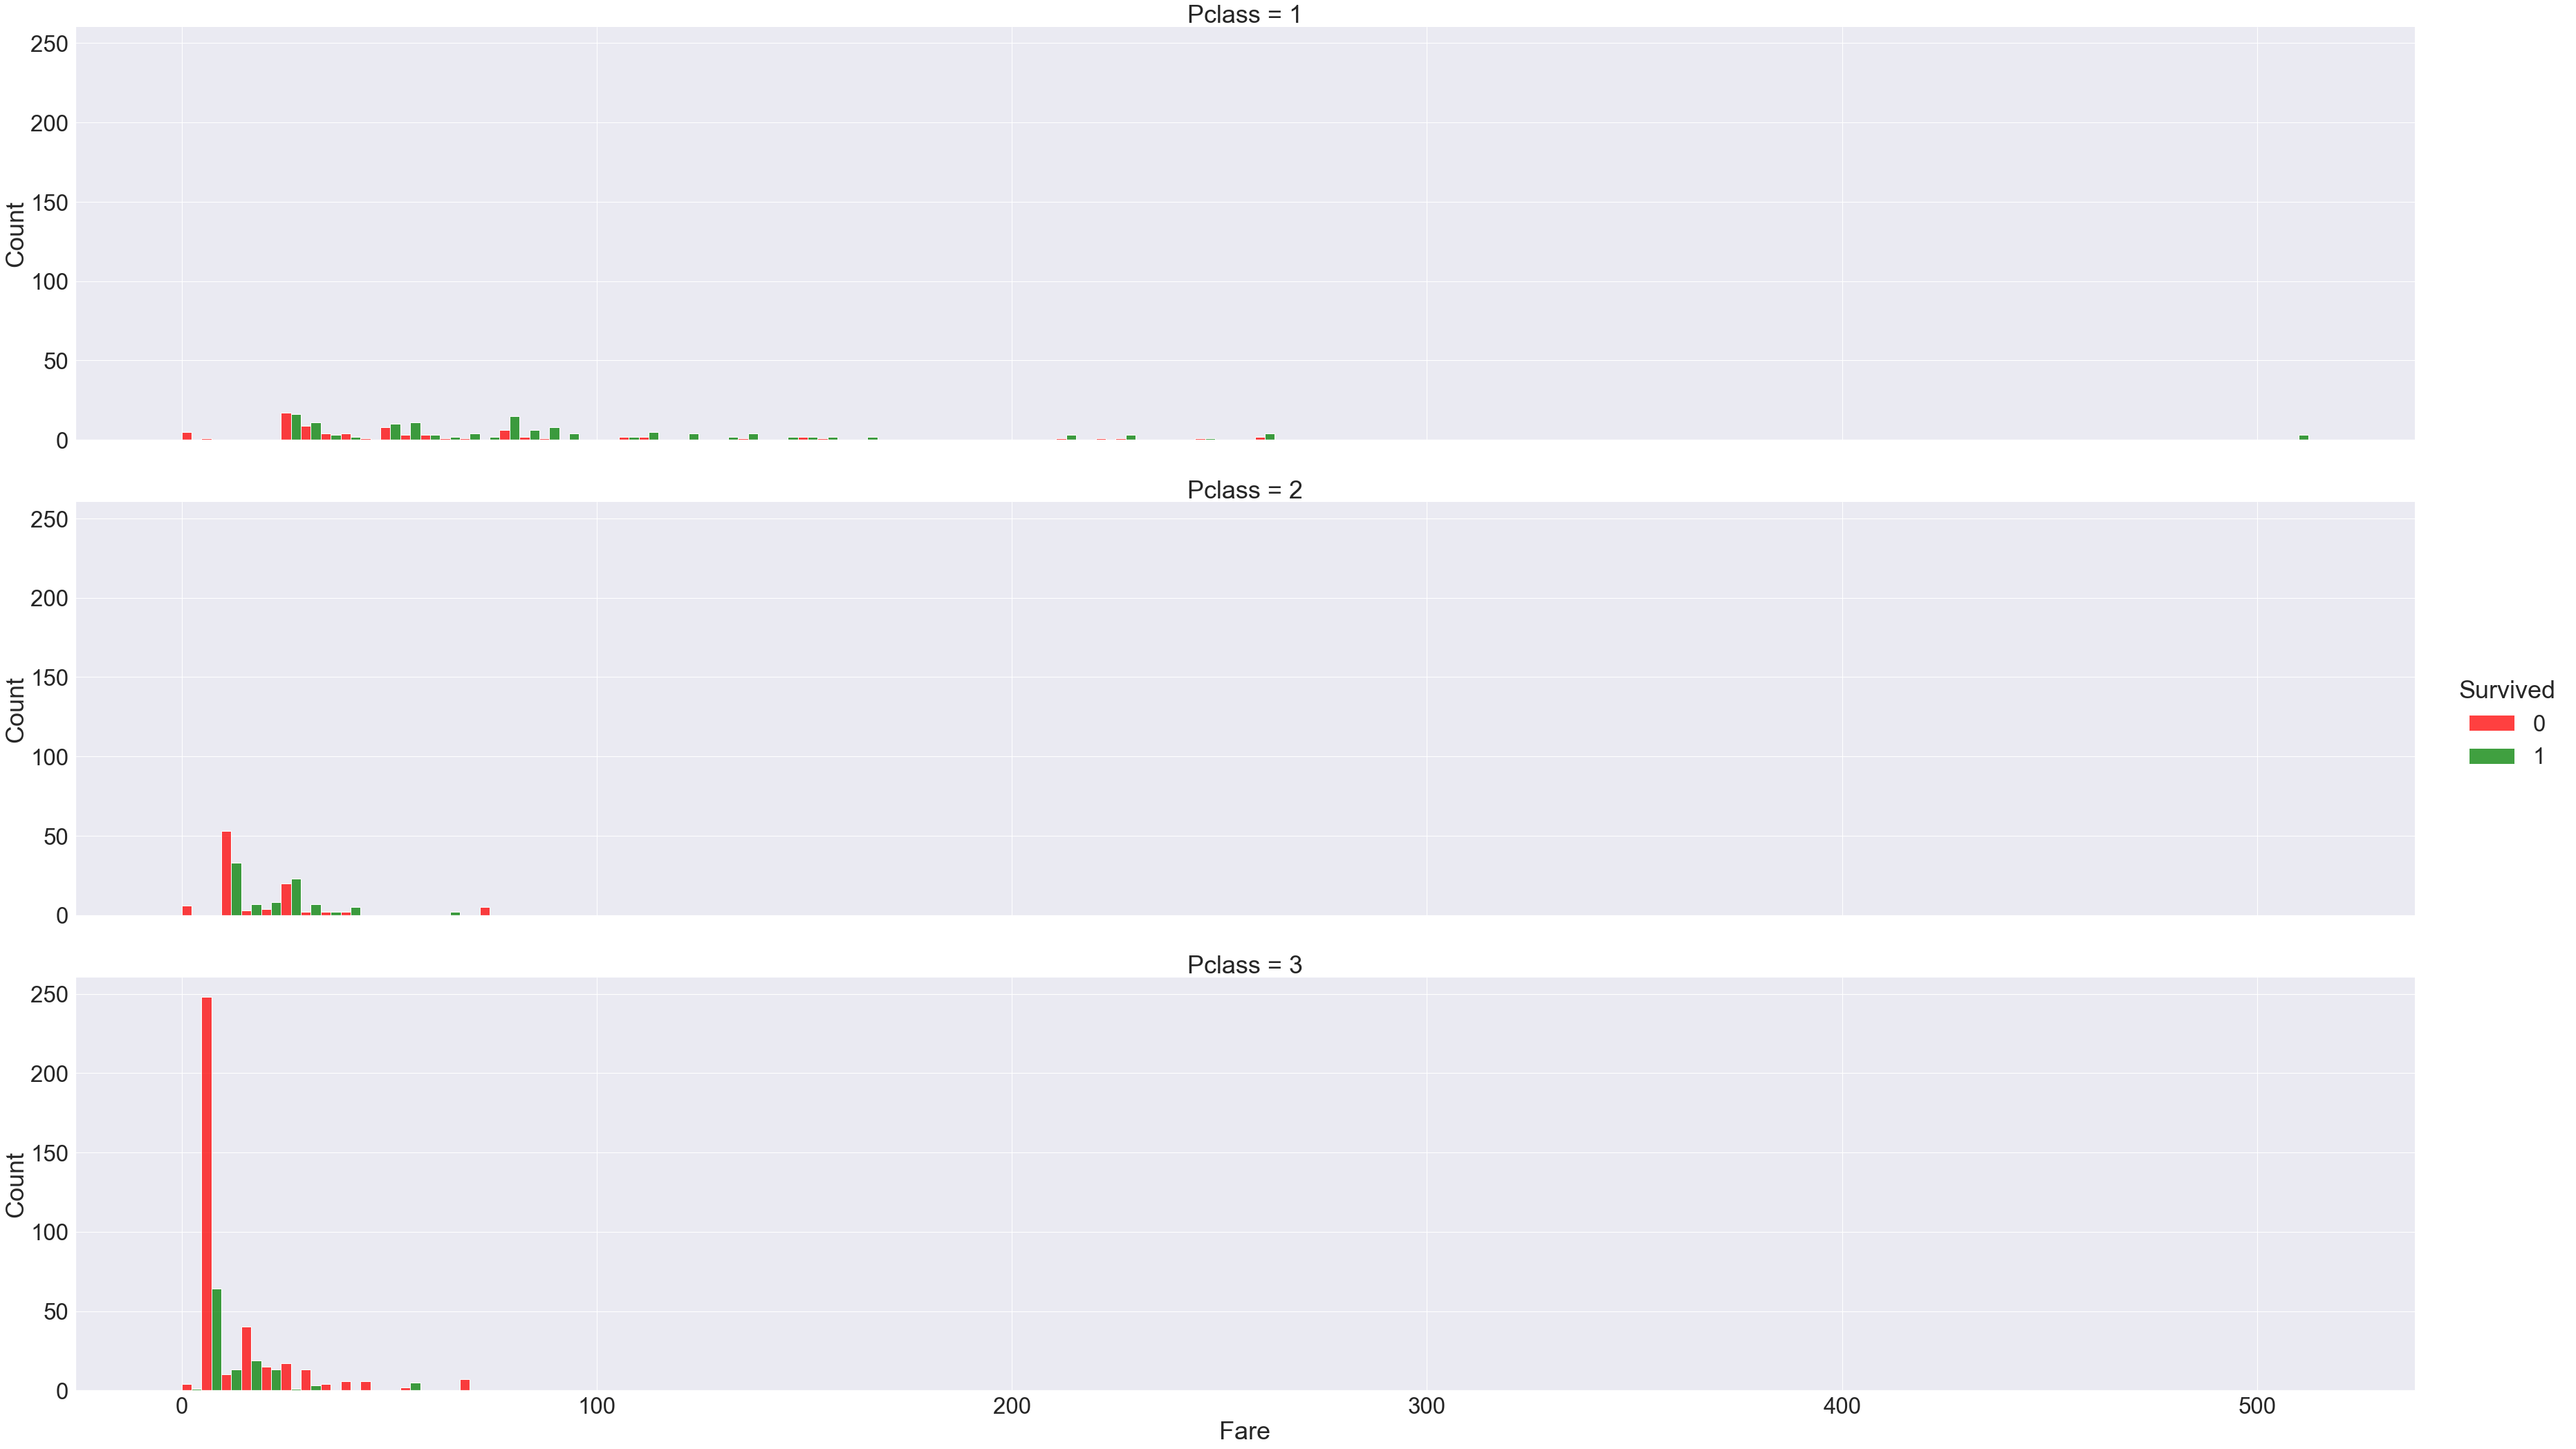

In [761]:
g0 = sns.displot(
    data = train,
    x = 'Sex',
    col = 'Embarked',
    hue = 'Survived',
    multiple='dodge',
    palette=['red', 'green']
)

g1 = sns.displot(
    data = train,
    x = 'Age',
    col = 'Sex',
    hue = 'Survived',
    multiple='dodge',
    palette=['red', 'green']
)

g1 = sns.displot(
    data = train,
    x = 'Fare',
    row = 'Pclass',
    hue = 'Survived',
    multiple='dodge',
    palette=['red', 'green'],
    height=10,
    aspect = 5
)

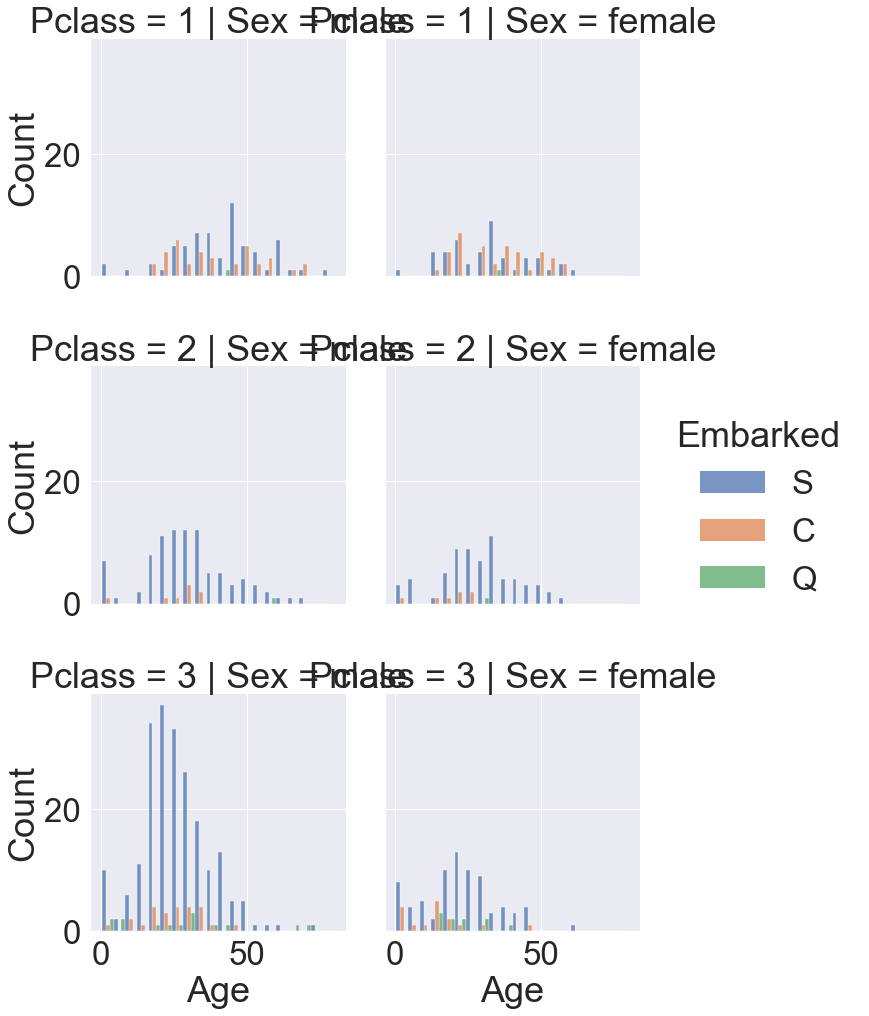

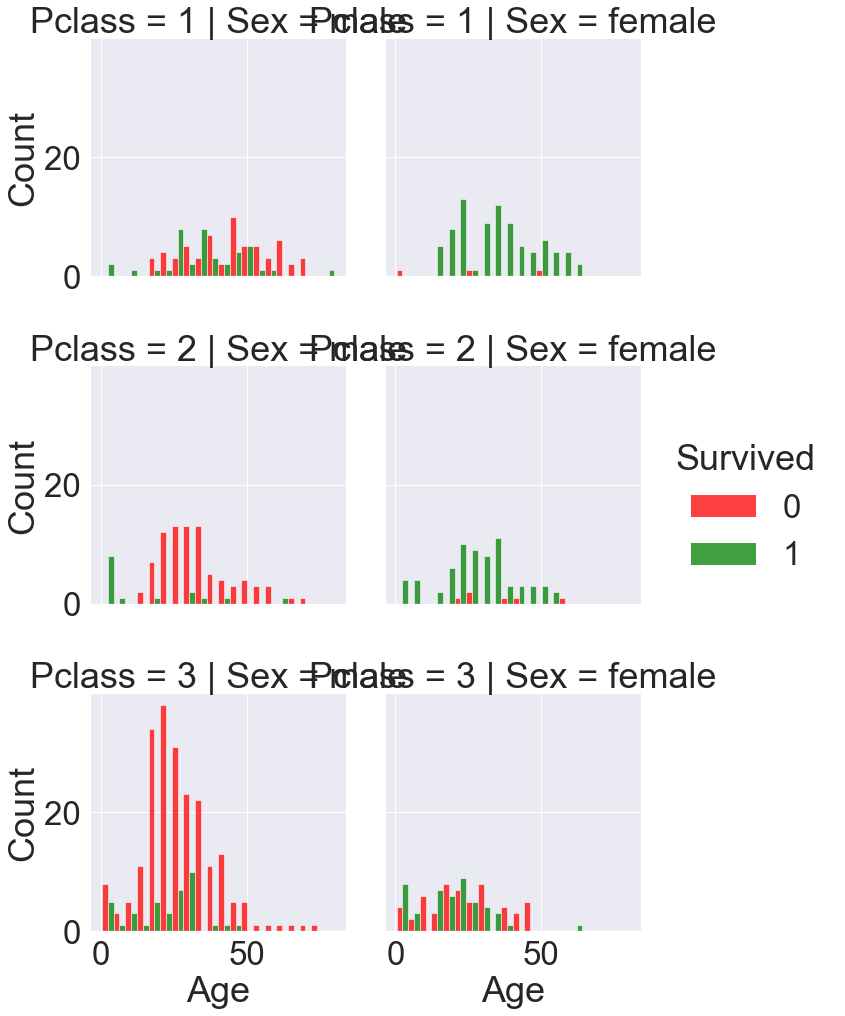

In [762]:
g0 = sns.displot(
    data = train,
    x = 'Age',
    col = 'Sex',
    row = 'Pclass',
    hue = 'Embarked',
    multiple='dodge'
)

g1 = sns.displot(
    data = train,
    x = 'Age',
    col = 'Sex',
    row = 'Pclass',
    hue = 'Survived',
    multiple='dodge',
    palette=['red', 'green']
)

## Data processing

### Tickets

The ticket is correlated with Pclass and Embarked port. We got too many unique values and it doesn't give us more information about survival of the passenger. Drop it

In [763]:
train = train.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)

### Dealing with NaNs

- Cabing: we'll explore this column to chosee between predict or delete the column
- Embarked: predict embarked over other columns
- Fare: predict fare over other columns
- Age: predict ages based on other columns

### Missing cabins...

In [764]:
# Count different values
train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
D              3
              ..
A24            1
E63            1
C86            1
E38            1
D19            1
Name: Cabin, Length: 147, dtype: int64

Eliminate the number. Let's play with letters

In [765]:
train['Cabin'] = train['Cabin'].str[0]
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C


In [766]:
# Count different values
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

#### Cabin visualization

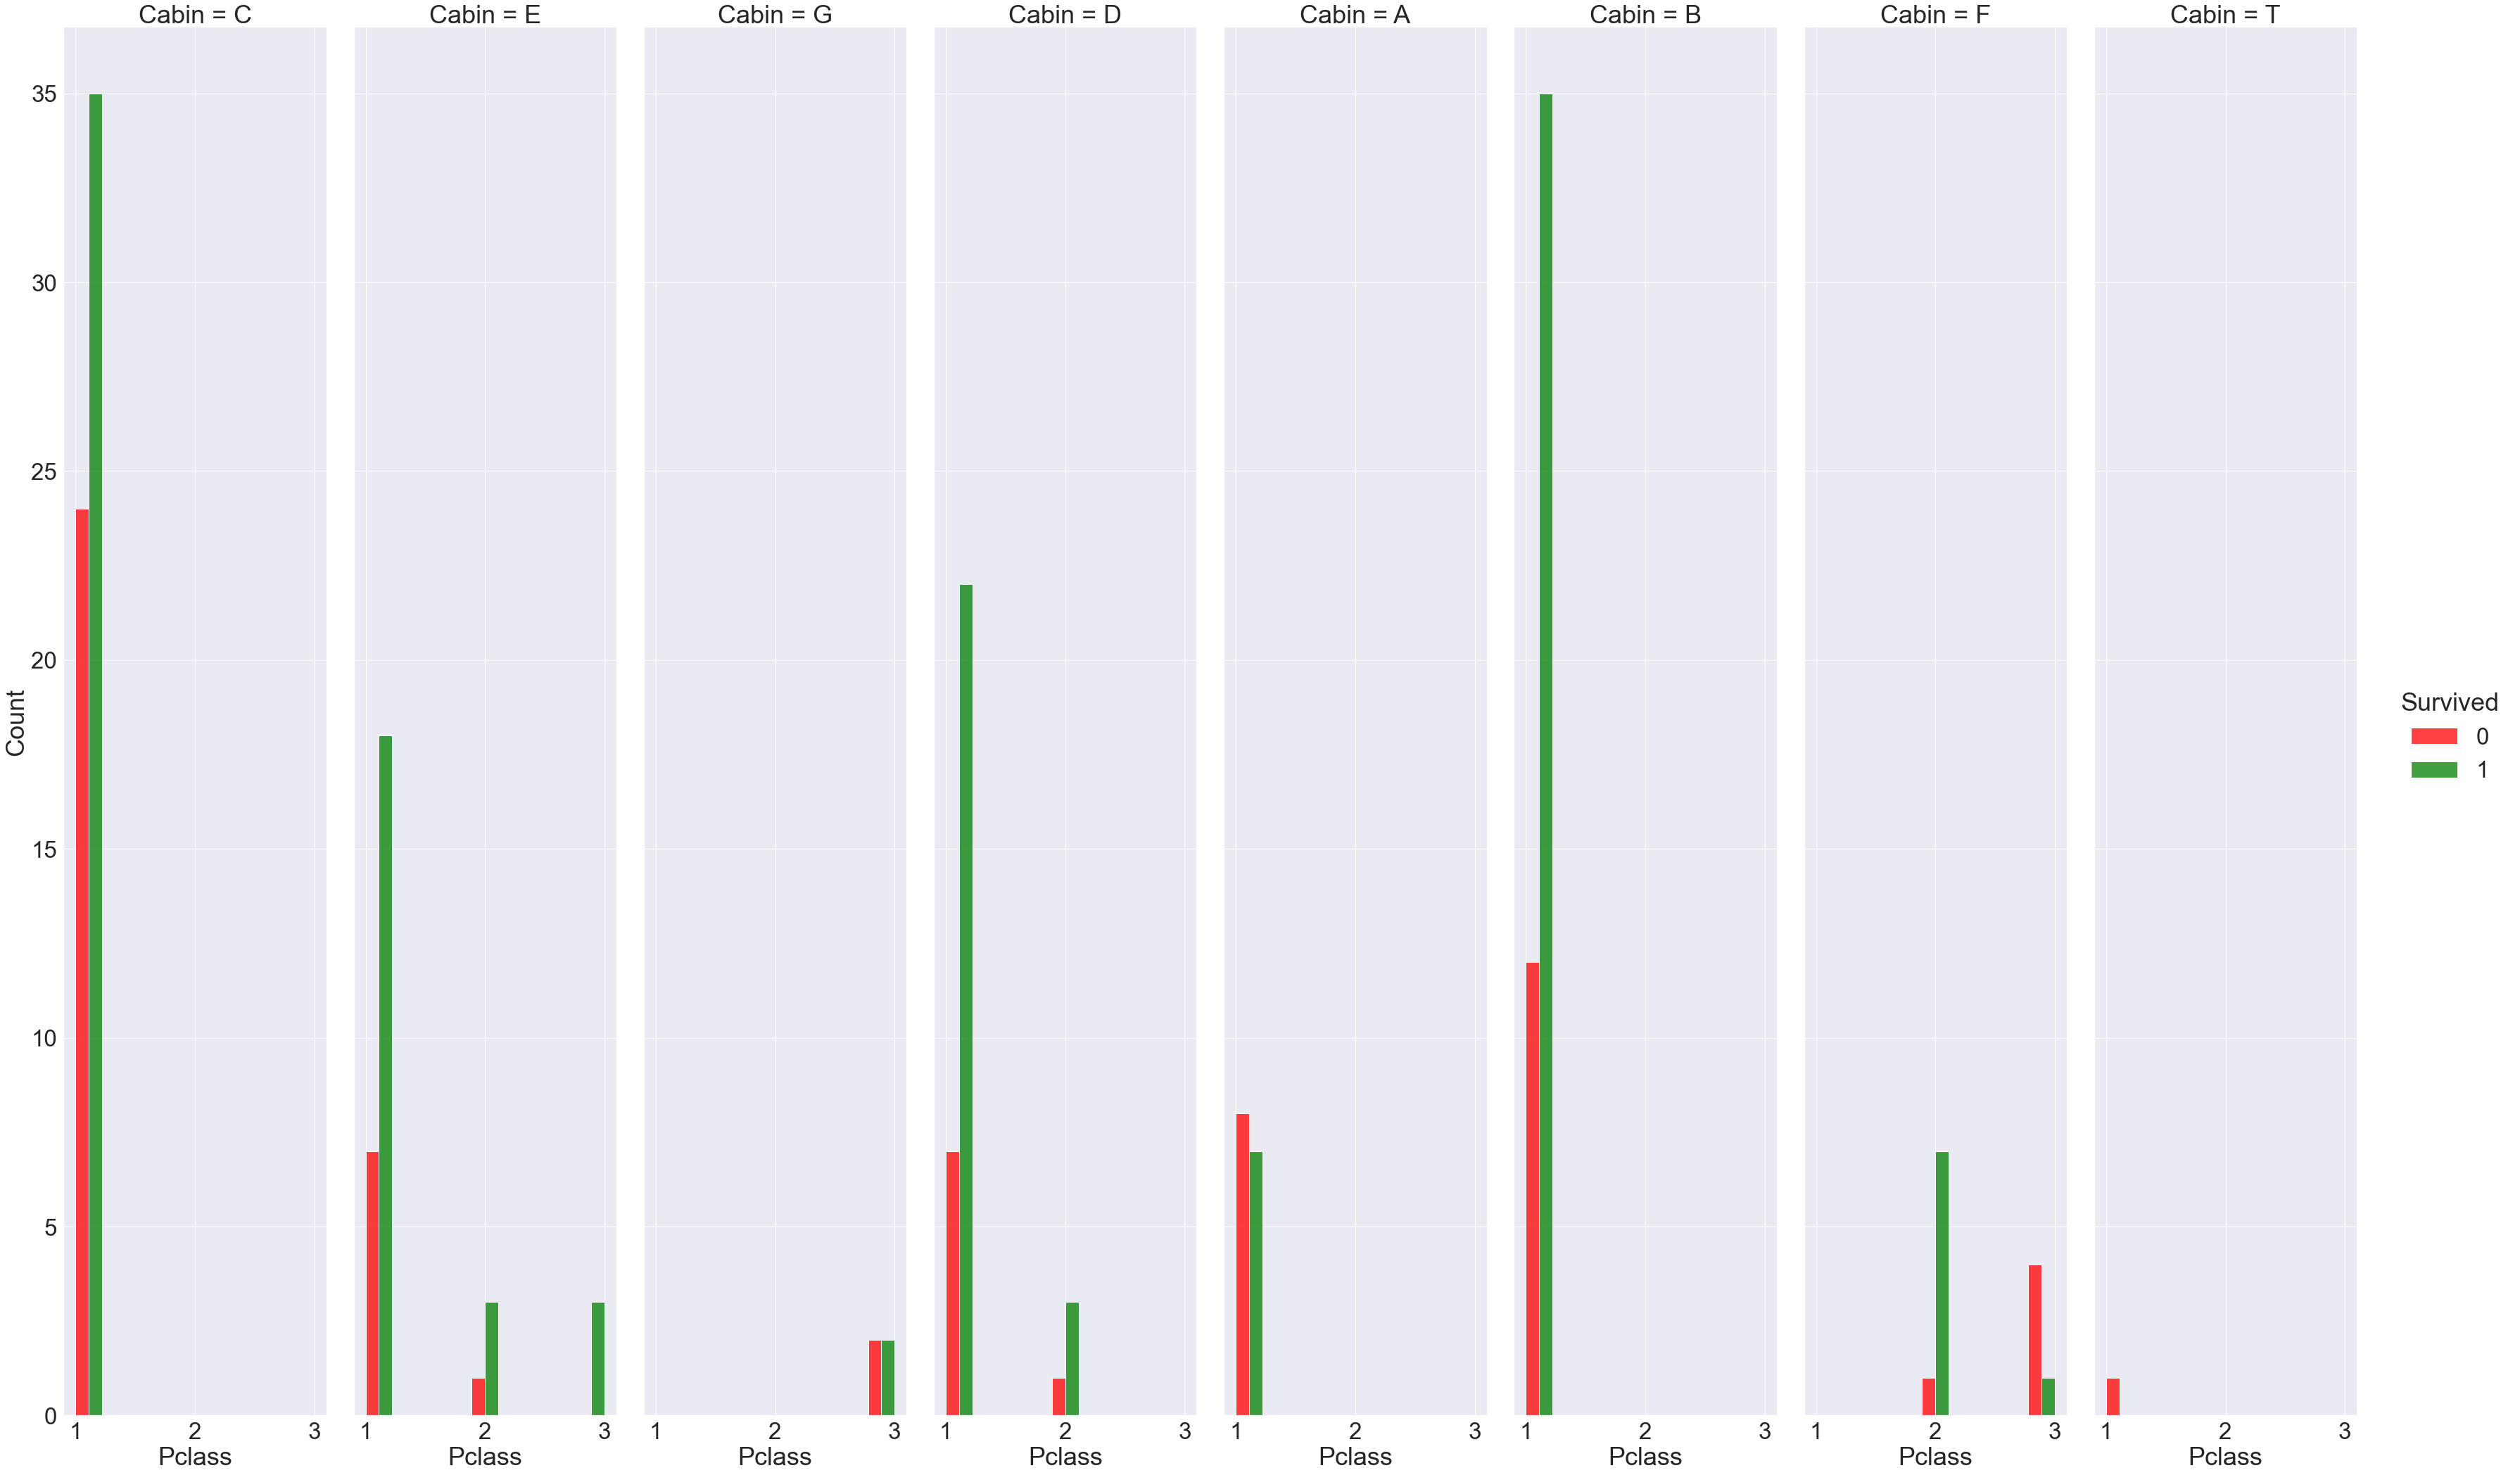

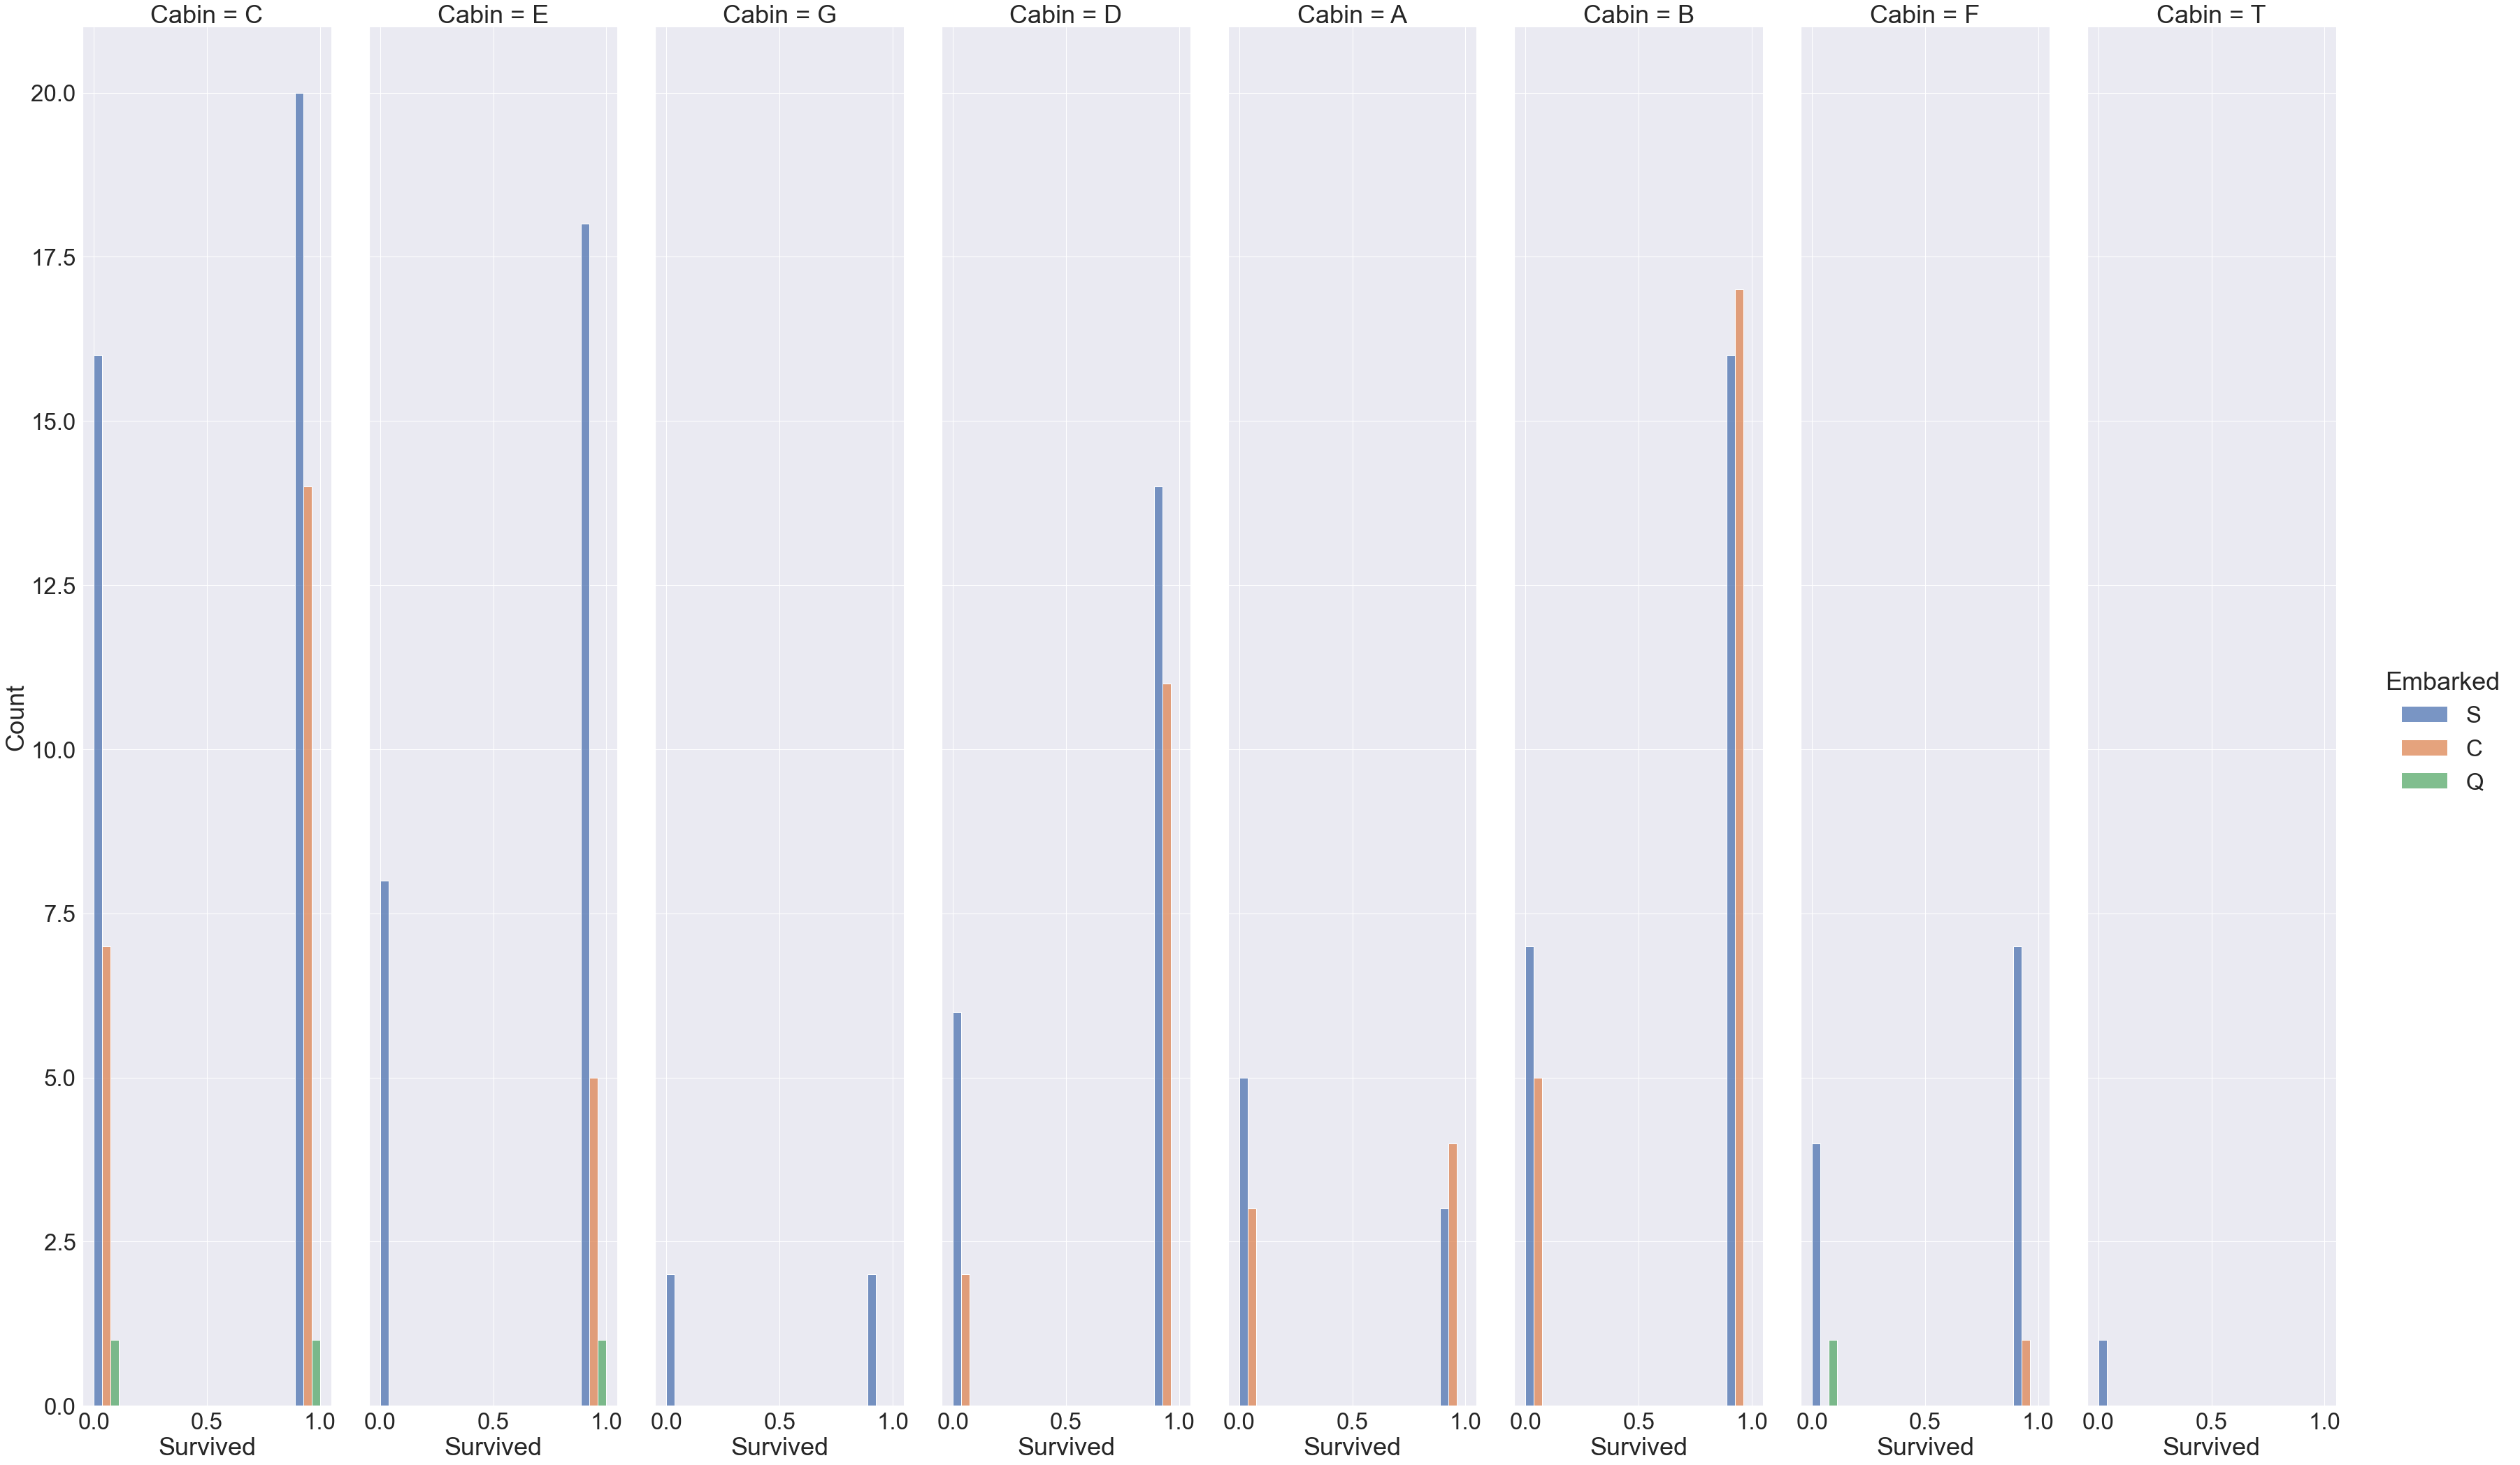

In [767]:
sns.displot(
    data=train,
    x='Pclass',
    col='Cabin',
    hue='Survived',
    multiple='dodge',
    palette=['red', 'green'],
    height=30, 
    aspect=0.2
)

sns.displot(
    data=train,
    x='Survived',
    col='Cabin',
    hue='Embarked',
    multiple='dodge',
    height=30, 
    aspect=0.2
)

sns.set(font_scale=3)

It seem like there's no significant correlation between any columns and, indeed, we don't have enough data about the cabin values. Let's drop that column

In [768]:
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)


### Two people not embarking?

We got two missing values for embarking column. Let's look at them

In [769]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


The previous visualization told us that most females from class 1 embarked throug 'C' so:

In [770]:
train['Embarked'] = train['Embarked'].fillna('C')

### Someone didn't paid in the test set

In [771]:
# Look at this fellow
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


He is in class 3 so make him pay the mean of class 3 fares

In [772]:
test['Fare'] = train['Fare'].fillna(train[train['Pclass'] == 3]['Fare'].mean())

In [773]:
test[test['PassengerId'] == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,8.05,S


In [774]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


### KNN Model to predict ages

In [775]:
train_copy = train.dropna()

X = train_copy.drop('Age', axis=1).iloc[:, 1:]
X = X.drop('Name', axis=1)
X = X.drop('Survived', axis=1)
X = X.dropna()
X = pd.get_dummies(X, columns=['Sex'])
X = pd.get_dummies(X, columns=['Embarked'])
X = pd.get_dummies(X, columns=['Pclass'])
X[['Fare']] = StandardScaler().fit_transform(X[['Fare']])

y = train_copy.iloc[:, 5].values

X = X.values

display(X)
display(y)

array([[ 1.        ,  0.        , -0.51897787, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.69189675, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.50621356, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.        , -0.08877362, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.08877362, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.50952283, ...,  0.        ,
         0.        ,  1.        ]])

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

In [776]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=0)

In [777]:
X_train

array([[ 0.        ,  0.        , -0.50621356, ...,  0.        ,
         0.        ,  1.        ],
       [ 4.        ,  1.        ,  0.09441775, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        , -0.48163046, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.        ,  0.84160215, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , -0.5075524 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        ,  2.46156602, ...,  1.        ,
         0.        ,  0.        ]])

In [778]:
X_test

array([[ 1.        ,  1.        , -0.38377082,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.        ,  0.        , -0.11312034,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.        ,  2.        ,  2.2097462 ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -0.41260868,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.        ,  0.        , -0.08877362,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.        ,  1.        , -0.19939757,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.   

In [779]:
classifier = KNeighborsRegressor(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsRegressor()

In [780]:
y_pred = classifier.predict(X_test)

In [781]:
print(y_pred)
print(y_test)

[20.    30.4   22.4   31.3   43.2   15.8   10.366 41.8   44.    41.
 24.4   24.4   23.6   23.1   34.6   37.4   36.2   11.5   21.8   38.8
 29.4   31.7   25.5   21.4   24.4   11.5   38.2   30.8   35.4   26.4  ]
[28.   50.    0.92 36.   26.   36.   31.   65.   65.   47.   22.   26.
  4.   39.   21.   55.   33.    0.75 24.   39.   20.   40.   14.   29.
 30.    0.75 36.   21.   27.   40.  ]


Mean square root error

In [782]:
mse = np.sqrt(((y_pred - y_test)**2)).mean()
print('Error: ', mse, 'Years')

Error:  11.207133333333335 Years


#### Applying regressor over train set

In [783]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [787]:
train_copy = train.copy()

train_copy = train_copy[train_copy['Age'].isnull()]
train_copy = train_copy.drop('Age', axis=1).iloc[:, 1:]
train_copy = train_copy.drop('Name', axis=1)
train_copy = train_copy.drop('Survived', axis=1)
train_copy = pd.get_dummies(train_copy, columns=['Sex'])
train_copy = pd.get_dummies(train_copy, columns=['Embarked'])
train_copy = pd.get_dummies(train_copy, columns=['Pclass'])
train_copy[['Fare']] = StandardScaler().fit_transform(train_copy[['Fare']])

y = train_copy.iloc[:, 5].values

train_copy = train_copy.values

In [788]:
display(train_copy)
display(y)

array([[ 0.        ,  0.        , -0.43103691, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        , -0.28814624, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        , -0.46983892, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.        , -0.39826302, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        , -0.44873425, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  2.        ,  0.04063099, ...,  0.        ,
         0.        ,  1.        ]])

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0], dtype=uint8)

In [789]:
nans_pred = classifier.predict(train_copy)

In [790]:
print(nans_pred)

[47.2 48.  14.7 31.7 21.5 23.2 35.4 21.5 31.7 31.7 23.2 42.2 21.5 21.
 41.  54.8 21.  23.2 23.2 21.5 23.2 23.2 23.2 23.2 23.7 23.2 47.2 12.3
 23.4 23.2 23.  10.2 23.4 39.   7.  10.2 26.1 41.  23.7 47.2 21.5 10.2
 47.2 23.2 11.  32.4 13.9 23.7 23.2 43.  47.2 21.5 41.  21.5 35.2 39.
 54.8 41.  21.5 29.4 34.6 23.2 39.4 10.2 20.8 30.  23.2 27.  41.  31.7
 21.5 21.5 42.2 14.7 21.5 26.2 23.2 47.2 11.  23.2 47.2 35.2 19.4 31.7
 23.2 47.2 27.  23.2 27.8 23.2 41.2 47.2 23.2 35.2 47.2 23.2 41.  35.2
 11.  27.8 27.6 23.1 21.5 39.  23.2 47.2 31.7 31.7 34.8 31.7 23.4 23.1
 25.1 47.2 36.  47.2 23.2 19.4 31.7 21.5 13.9 31.7 23.2 26.  34.2 31.7
 23.2 41.  26.2 23.7 47.2 47.2 39.4 27.8 29.2 23.2 23.2 21.5 23.2 23.2
 41.2 35.2 21.5 29.2 21.5 21.  39.  47.2 21.5 35.2 23.2 23.2 41.  23.1
 40.8 42.2 31.7 47.2 47.2 17.  47.2 10.2 54.8 39.4 47.2 29.2 47.2 31.7
 23.2 54.8 10.2 34.  31.7 10.2 21.5 23.2 23.6]


Fill the original train dataframe with these values

In [791]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [792]:
m = train['Age'].isna()
train.loc[m, 'Age'] = nans_pred

In [793]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.6,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


#### Same over test set

In [795]:
test_copy = test.copy()

test_copy = test_copy[test_copy['Age'].isnull()]
test_copy = test_copy.drop('Age', axis=1).iloc[:, 1:]
test_copy = test_copy.drop('Name', axis=1)
test_copy = pd.get_dummies(test_copy, columns=['Sex'])
test_copy = pd.get_dummies(test_copy, columns=['Embarked'])
test_copy = pd.get_dummies(test_copy, columns=['Pclass'])
test_copy[['Fare']] = StandardScaler().fit_transform(test_copy[['Fare']])

y = test_copy.iloc[:, 5].values

test_copy = test_copy.values

In [796]:
nans_pred_test = classifier.predict(test_copy)

In [800]:
len(nans_pred_test)

86

In [801]:
m = test['Age'].isna()
test.loc[m, 'Age'] = nans_pred_test

That's all... for now.

## Predictions

In [802]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.6,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [812]:
X = train.iloc[:, 1:]
X = X.drop('Name', axis=1)
X = X.drop('Survived', axis=1)
X = pd.get_dummies(X, columns=['Sex'])
X = pd.get_dummies(X, columns=['Embarked'])
X = pd.get_dummies(X, columns=['Pclass'])
X[['Fare']] = StandardScaler().fit_transform(X[['Fare']])

y = train.iloc[:, 1].values

display(X)

X = X.values

display(X)
display(y)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,-0.502445,0,1,0,0,1,0,0,1
1,38.0,1,0,0.786845,1,0,1,0,0,1,0,0
2,26.0,0,0,-0.488854,1,0,0,0,1,0,0,1
3,35.0,1,0,0.420730,1,0,0,0,1,1,0,0
4,35.0,0,0,-0.486337,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,-0.386671,0,1,0,0,1,0,1,0
887,19.0,0,0,-0.044381,1,0,0,0,1,1,0,0
888,23.6,1,2,-0.176263,1,0,0,0,1,0,0,1
889,26.0,0,0,-0.044381,0,1,1,0,0,1,0,0


array([[22. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  0. , ...,  1. ,  0. ,  0. ],
       [26. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [23.6,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       [26. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
       [32. ,  0. ,  0. , ...,  0. ,  0. ,  1. ]])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [804]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=0)

In [805]:
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [806]:
y_pred = rf_classifier.predict(X_test)

In [807]:
cm = confusion_matrix(y_test, y_pred)
print('Confussion matrix:\n', cm)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Confussion matrix:
 [[13  2]
 [ 3 12]]
Accuracy: 0.83


## Prediction over test.csv

In [808]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.2500,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,71.2833,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,7.9250,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,53.1000,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,8.0500,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,38.0,0,0,0.0000,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,7.9250,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,8.0500,S
416,1308,3,"Ware, Mr. Frederick",male,29.2,0,0,32.5000,S


In [815]:
test_copy = test.copy()

test_copy = test_copy.iloc[:, 1:]
test_copy = test_copy.drop('Name', axis=1)
test_copy = pd.get_dummies(test_copy, columns=['Sex'])
test_copy = pd.get_dummies(test_copy, columns=['Embarked'])
test_copy = pd.get_dummies(test_copy, columns=['Pclass'])
test_copy[['Fare']] = StandardScaler().fit_transform(test_copy[['Fare']])

test_copy = test_copy.values

display(test_copy)

array([[34.5,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [47. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       [62. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [38.5,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [29.2,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [21. ,  1. ,  1. , ...,  0. ,  0. ,  1. ]])

In [816]:
final_pred = rf_classifier.predict(test_copy)

#### Create submission

In [819]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.2500,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,71.2833,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,7.9250,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,53.1000,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,8.0500,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,38.0,0,0,0.0000,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,7.9250,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,8.0500,S
416,1308,3,"Ware, Mr. Frederick",male,29.2,0,0,32.5000,S


In [824]:
submission = test['PassengerId'].to_frame()
submission['Survived'] = final_pred

In [828]:
submission.to_csv('../res/titanic/submission_titanic.csv', index=False)